In [2]:
pip install nltk

In [3]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ADMIN\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
import seaborn as sns

In [5]:
data = pd.read_csv('Movie_Review.csv')
data

,text,sentiment
0,115w1a sd1 w5a1 sd1w5a1 dMy daughter liked it ...,neg
1,I... No words. No words can describe this. I w...,neg
2,this film is basically a poor take on the old ...,neg
3,"This is a terrible movie, and I'm not even sur...",neg
4,First of all this movie is a piece of reality ...,pos
...,...,...
995,"""Campfire Tales"" is basically made up of three...",pos
996,I just saw this film at the phoenix film festi...,pos
997,It's out of question that the real Anna Anders...,pos
998,Michelle Pfeiffer stars as a mob widow who see...,pos


In [6]:
data.dropna(inplace=True)

In [7]:
import string
from nltk.corpus import stopwords # is,a am
from nltk.stem import PorterStemmer # walking, walks = walk

def clean_review(review):
    # Initialize stopwords and stemmer
    stop_words = set(stopwords.words('english'))
    stemmer = PorterStemmer()
    
    # Remove punctuation and stopwords, and apply stemming
    review = review.translate(str.maketrans('', '', string.punctuation))
    cleaned_review = ' '.join(stemmer.stem(word) for word in review.split() if word.lower() not in stop_words)
    
    return cleaned_review


In [8]:
data['text'] = data['text'].apply(clean_review)

In [1]:
#wordcloud 
from wordcloud import WordCloud

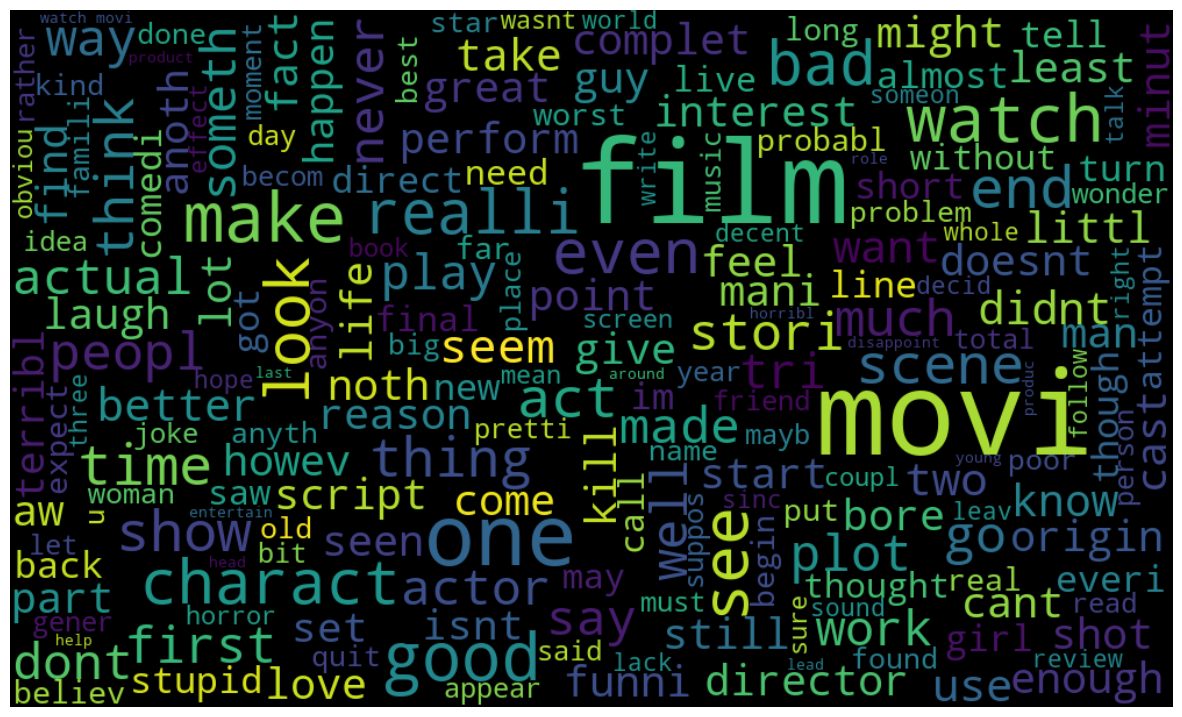

In [10]:
#draw Wordcloud
reviews = ' '.join(word for word in data['text'][data['sentiment'] == 'neg'].astype(str))
wordcloud = WordCloud(height = 600,width =1000, max_font_size = 100)
plt.figure(figsize = (15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

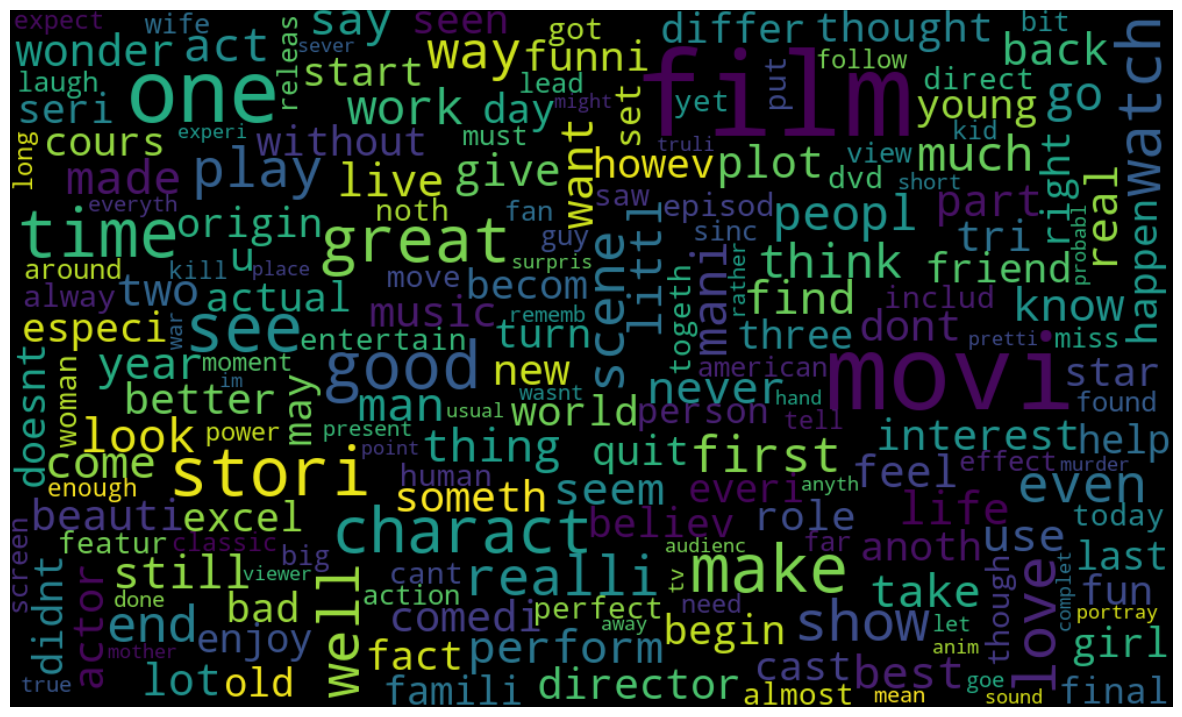

In [11]:
# Words fetch
# POSITIVE
reviews = ' '.join(word for word in data['text'][data['sentiment']== 'pos'].astype(str))
wordcloud = WordCloud(height = 600, width = 1000, max_font_size =100)
plt.figure(figsize=(15,12))
plt.imshow(wordcloud.generate(reviews), interpolation='bilinear')
plt.axis('off')
plt.show()

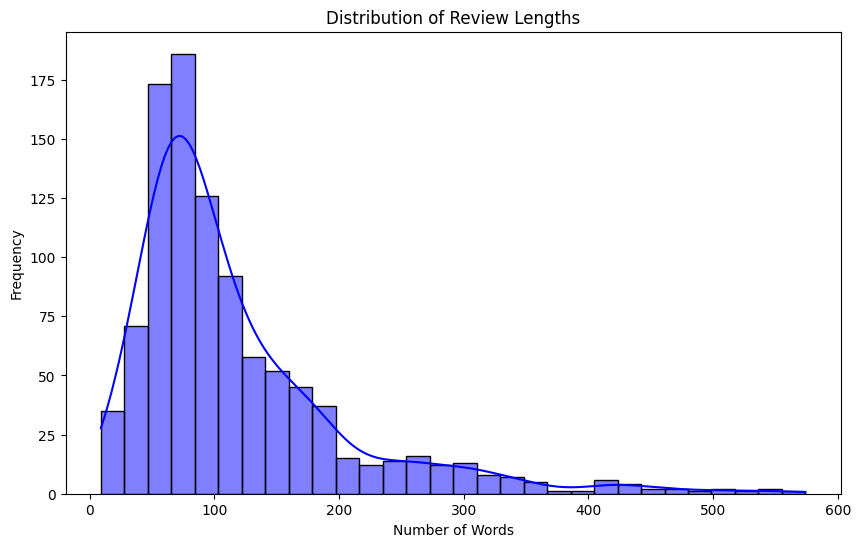

In [12]:
data['review_length'] = data['text'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10, 6))
sns.histplot(data['review_length'], bins=30, kde=True, color='blue')
plt.title('Distribution of Review Lengths')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()

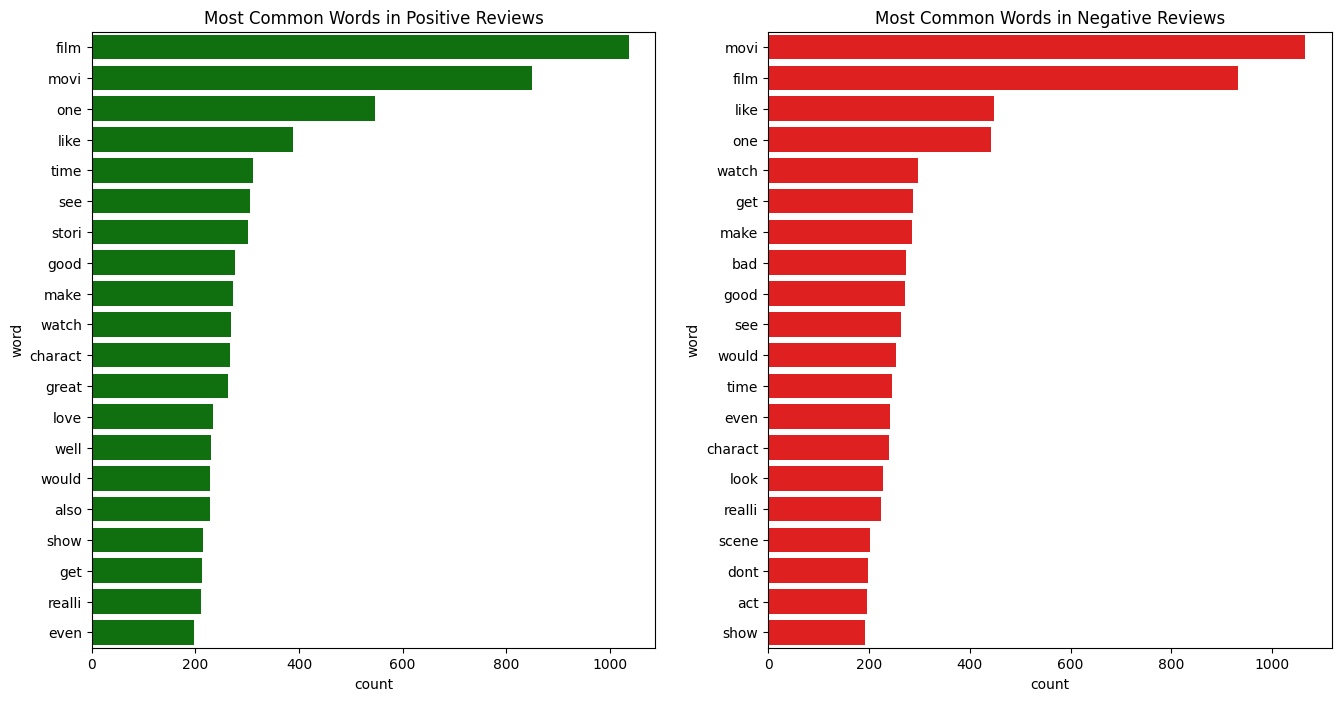

In [13]:
from collections import Counter
positive_reviews = ' '.join(data['text'][data['sentiment'] == 'pos'])
negative_reviews = ' '.join(data['text'][data['sentiment'] == 'neg'])

positive_words = Counter(positive_reviews.split()).most_common(20)
negative_words = Counter(negative_reviews.split()).most_common(20)

# Bar plots for most common words
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

positive_df = pd.DataFrame(positive_words, columns=['word', 'count'])
negative_df = pd.DataFrame(negative_words, columns=['word', 'count'])

sns.barplot(x='count', y='word', data=positive_df, ax=axes[0], color='green')
axes[0].set_title('Most Common Words in Positive Reviews')

sns.barplot(x='count', y='word', data=negative_df, ax=axes[1], color='red')
axes[1].set_title('Most Common Words in Negative Reviews')

plt.show()

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
cv = TfidfVectorizer(max_features=2500)

In [15]:
reviews = cv.fit_transform(data['text']).toarray()

In [16]:
data['sentiment'] = data['sentiment'].replace(['pos','neg'],[1,0])

In [17]:
data['sentiment'].value_counts()

0    500
1    500
Name: sentiment, dtype: int64

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
model = LogisticRegression()

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
reviews_train, reviews_test, sent_train, sent_test = train_test_split(reviews, data['sentiment'], test_size=0.2)

In [22]:
data

,text,sentiment,review_length
0,115w1a sd1 w5a1 sd1w5a1 dmi daughter like agha...,0,79
1,word word describ tri sake brave peopl stick k...,0,154
2,film basic poor take old urban legend babysitt...,0,75
3,terribl movi im even sure terribl ugli one tre...,0,81
4,first movi piec realiti well realiz artist kin...,1,84
...,...,...,...
995,campfir tale basic made three spooki stori gro...,1,172
996,saw film phoenix film festiv today love synops...,1,114
997,question real anna anderson princess anastasia...,1,184
998,michel pfeiffer star mob widow seek normal lif...,1,27


In [23]:
model.fit(reviews_train,sent_train)

LogisticRegression()

In [24]:
predict = model.predict(reviews_test)
predict

array([1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 0], dtype=int64)

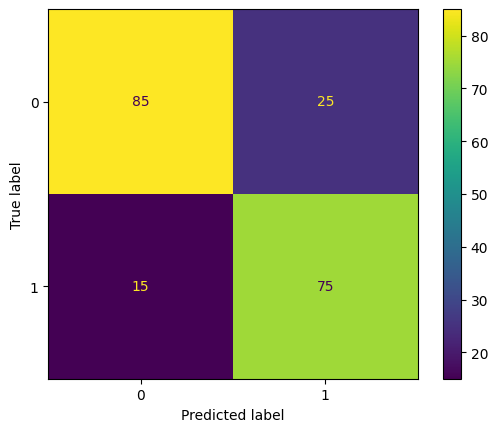

In [25]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
cm = confusion_matrix(sent_test, predict, labels=model.classes_)
display = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels=model.classes_)
display.plot()
plt.show()

In [26]:
import pickle as pk

In [27]:
pk.dump(model,open('model.pkl','wb'))

In [28]:
pk.dump(cv,open('scaler.pkl','wb'))